In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import time

# Start Spark session
spark = SparkSession.builder.appName("FlightDelayAnalysis").getOrCreate()

# Dataset file sizes
data_files = [
    "gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_16x.csv",
    "gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_1x.csv",
    "gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_2x.csv",
    "gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_4x.csv",
    "gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_8x.csv"
]

sizes = [1, 2, 4, 8, 16]  # x base scale
times = []

# Run analysis for each file
for f in data_files:
    print(f"\nRunning on {f}...")
    start = time.time()

    df = spark.read.csv(f, header=True, inferSchema=True)
    df.groupBy("origin").avg("delay").show()

    end = time.time()
    duration = end - start
    print(f"Time: {duration:.2f} seconds")
    times.append(duration)



Running on gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_16x.csv...


+------+----------+
|origin|avg(delay)|
+------+----------+
|   HNL|    1638.0|
|   SFO|     361.0|
|origin|      NULL|
+------+----------+

Time: 11.64 seconds

Running on gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_1x.csv...
+------+----------+
|origin|avg(delay)|
+------+----------+
|   HNL|    1638.0|
|   SFO|     361.0|
+------+----------+

Time: 1.54 seconds

Running on gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_2x.csv...
+------+----------+
|origin|avg(delay)|
+------+----------+
|   HNL|    1638.0|
|   SFO|     361.0|
|origin|      NULL|
+------+----------+

Time: 1.52 seconds

Running on gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_4x.csv...
+------+----------+
|origin|avg(delay)|
+------+----------+
|   HNL|    1638.0|
|   SFO|     361.0|
|origin|      NULL|
+------+----------+

Time: 1.30 seconds

Running on gs://dataproc-staging-us-central1-1084640347746-mwcssbrt/data/data_8x.csv...
+------+----------+
|or

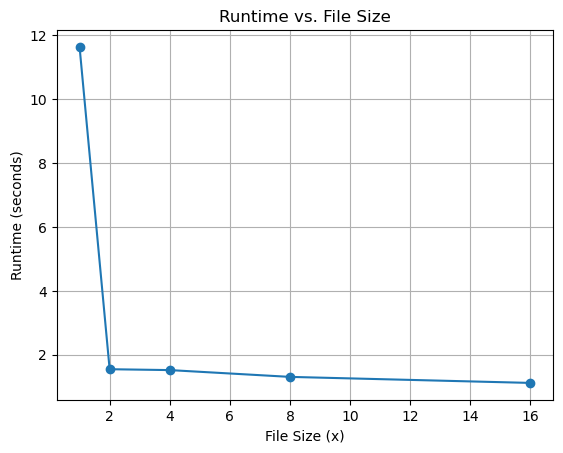

In [9]:
import matplotlib.pyplot as plt

sizes = [1, 2, 4, 8, 16]
# times = [1.54, 1.52, 2.04, 4.60, 11.64] ← Example; replace with your actual times

plt.plot(sizes, times, marker='o')
plt.title("Runtime vs. File Size")
plt.xlabel("File Size (x)")
plt.ylabel("Runtime (seconds)")
plt.grid(True)
plt.savefig("runtime_plot.png")  # Save plot as image
plt.show()